In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
#Veri setini yükleyelim
df = pd.read_csv("UEFA Euro 2024 - Goals Stats.csv")

In [5]:
#Veri setine genel bakış
df.head()

,Team,Group,Matches Played,Won,Drawn,Lost,Total Goals,Right Foot Goals,Left Foot Goals,Head Goals,Other Goals,Goals Inside Area,Goals Outside Area,Penalties Scored
0,Albania,B,3,0,1,2,3,1,1,1,0,3,0,0
1,Austria,D,4,2,0,2,7,3,1,2,0,6,0,1
2,Belgium,E,4,1,1,2,2,2,0,0,0,1,1,0
3,Croatia,B,3,0,2,1,3,1,1,0,0,2,0,0
4,Czechia,F,3,0,1,2,3,2,0,0,1,2,1,0


In [6]:
#Sondan beş veriye bakış
df.tail()

,Team,Group,Matches Played,Won,Drawn,Lost,Total Goals,Right Foot Goals,Left Foot Goals,Head Goals,Other Goals,Goals Inside Area,Goals Outside Area,Penalties Scored
19,Slovenia,C,4,0,4,0,2,1,1,0,0,1,1,0
20,Spain,B,6,6,0,0,13,4,6,2,0,11,1,0
21,Switzerland,A,5,2,3,0,8,6,2,0,0,6,2,0
22,Turkiye,F,5,3,0,2,8,4,2,2,0,6,2,0
23,Ukraine,E,3,1,1,1,2,1,1,0,0,2,0,0


In [7]:
#Veri setinin boyu (Kaça kaçlık matris?)
df.shape

(24, 14)

In [8]:
#Index bilgisine bakalım (Başlangıç – bitiş index değerini ve ne kadar atlayarak gittiği)
df.index

RangeIndex(start=0, stop=24, step=1)

In [9]:
#Değişken isimlerine bakalım (Sütun isimleri)
df.columns

Index(['Team', 'Group', 'Matches Played', 'Won ', 'Drawn', 'Lost',
       'Total Goals', 'Right Foot Goals', 'Left Foot Goals', 'Head Goals',
       'Other Goals', 'Goals Inside Area', 'Goals Outside Area',
       'Penalties Scored'],
      dtype='object')

In [10]:
#Veri tipleri (Numerik - kategorik değişken)
df.dtypes

,0
Team,object
Group,object
Matches Played,int64
Won,int64
Drawn,int64
Lost,int64
Total Goals,int64
Right Foot Goals,int64
Left Foot Goals,int64
Head Goals,int64


In [11]:
#Detaylı bilgi için (Sütunların hangi veri tipinden olduğuna bakalım)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Team                24 non-null     object
 1   Group               24 non-null     object
 2   Matches Played      24 non-null     int64 
 3   Won                 24 non-null     int64 
 4   Drawn               24 non-null     int64 
 5   Lost                24 non-null     int64 
 6   Total Goals         24 non-null     int64 
 7   Right Foot Goals    24 non-null     int64 
 8   Left Foot Goals     24 non-null     int64 
 9   Head Goals          24 non-null     int64 
 10  Other Goals         24 non-null     int64 
 11  Goals Inside Area   24 non-null     int64 
 12  Goals Outside Area  24 non-null     int64 
 13  Penalties Scored    24 non-null     int64 
dtypes: int64(12), object(2)
memory usage: 2.8+ KB


In [12]:
#Değişkenlerde eksiklik durumu var mı? (Yok)
df.isnull().sum()

,0
Team,0
Group,0
Matches Played,0
Won,0
Drawn,0
Lost,0
Total Goals,0
Right Foot Goals,0
Left Foot Goals,0
Head Goals,0


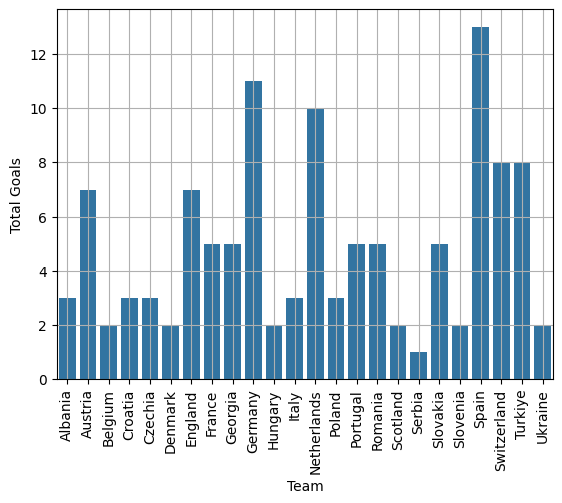

In [13]:
#VERİ GÖRSELLEŞTİRME

sns.barplot(x = "Team", y = "Total Goals", data = df);
plt.xticks(rotation = 90);   # X eksenindeki etiketleri dikey olarak hizalar.
plt.grid(True);  #Izgara çizgilerinin gözükmesini sağlar.

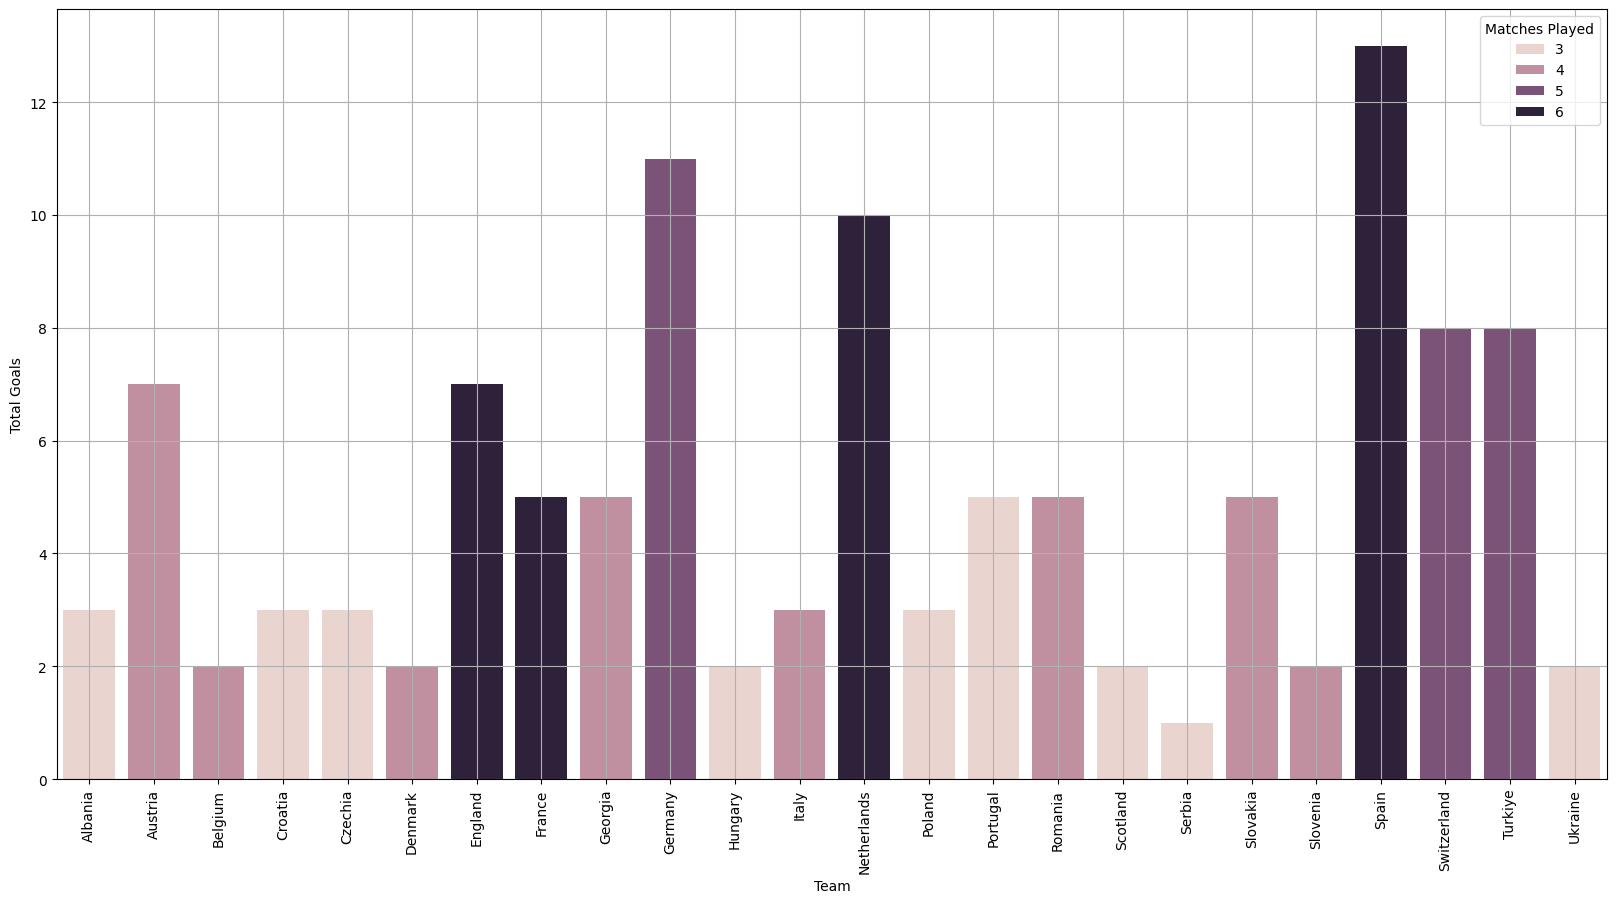

In [14]:
#VERİ ÇAPRAZLAMA

#Oynanan maç sayısı
plt.figure(figsize=(20,10))     #Grafiğin boyutu 20x10.
sns.barplot(x = "Team", y = "Total Goals", data = df, hue = "Matches Played"); #Hue: renk tonu.
plt.xticks(rotation = 90);
plt.grid(True);

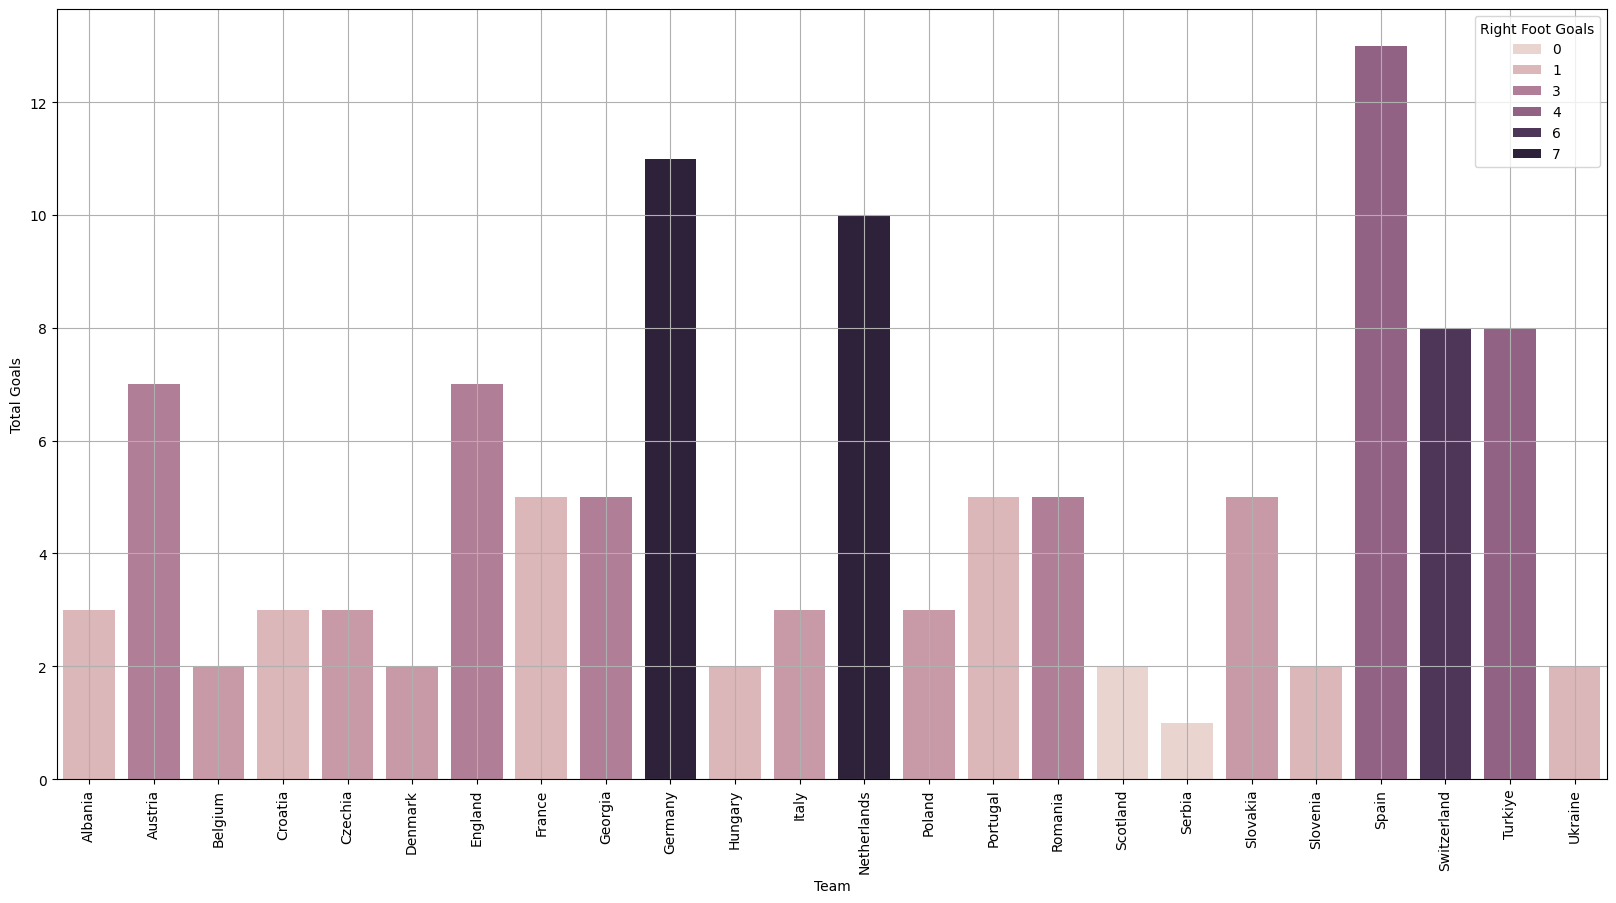

In [15]:
#Sağ ayakla atılan gol sayısı.

plt.figure(figsize=(20,10))
sns.barplot(x = "Team", y = "Total Goals", data = df, hue = "Right Foot Goals");
plt.xticks(rotation = 90);
plt.grid(True);

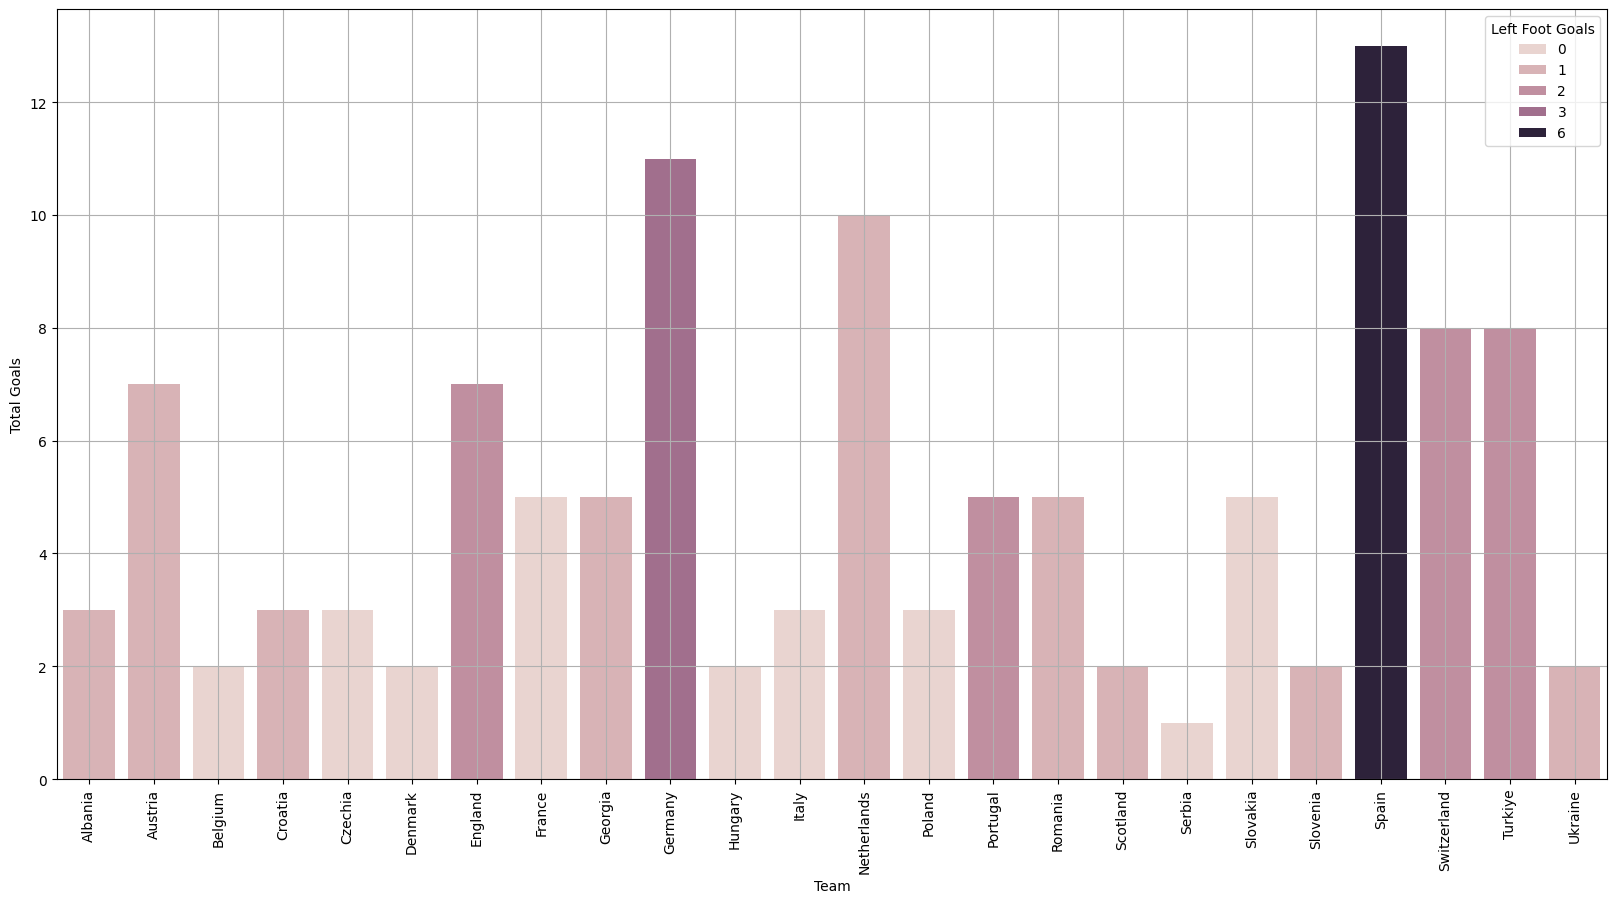

In [16]:
#Sol ayakla atılan gol sayısı.

plt.figure(figsize=(20,10))
sns.barplot(x = "Team", y = "Total Goals", data = df, hue = "Left Foot Goals");
plt.xticks(rotation = 90);
plt.grid(True);

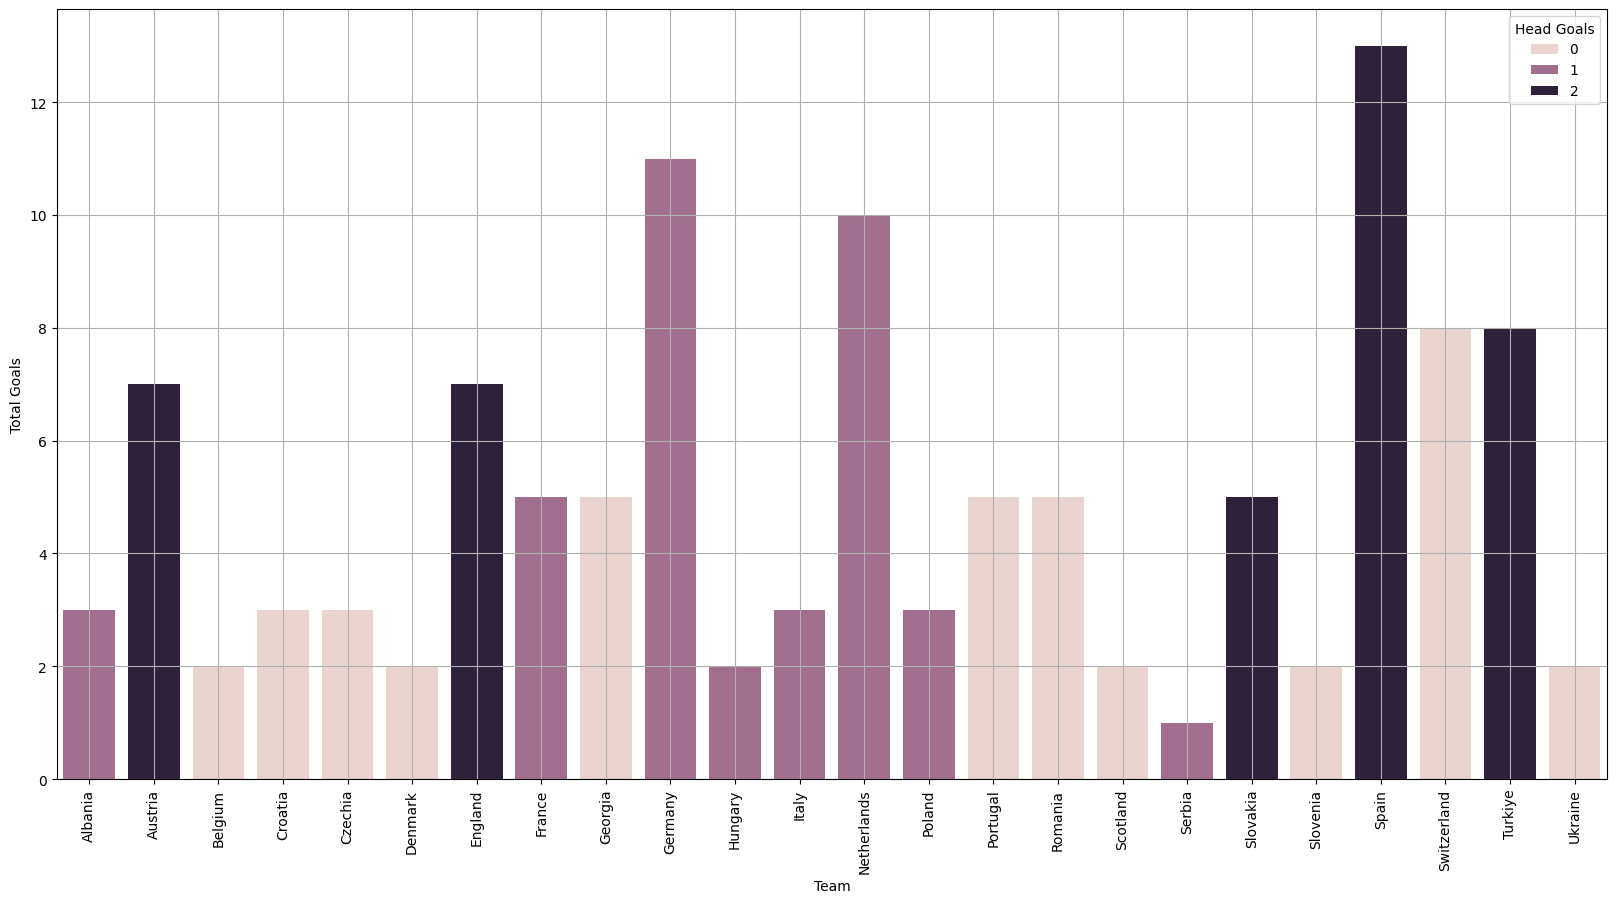

In [17]:
#Kafa ile atılan gol sayısı.

plt.figure(figsize=(20,10))
sns.barplot(x = "Team", y = "Total Goals", data = df, hue = "Head Goals");
plt.xticks(rotation = 90);
plt.grid(True);

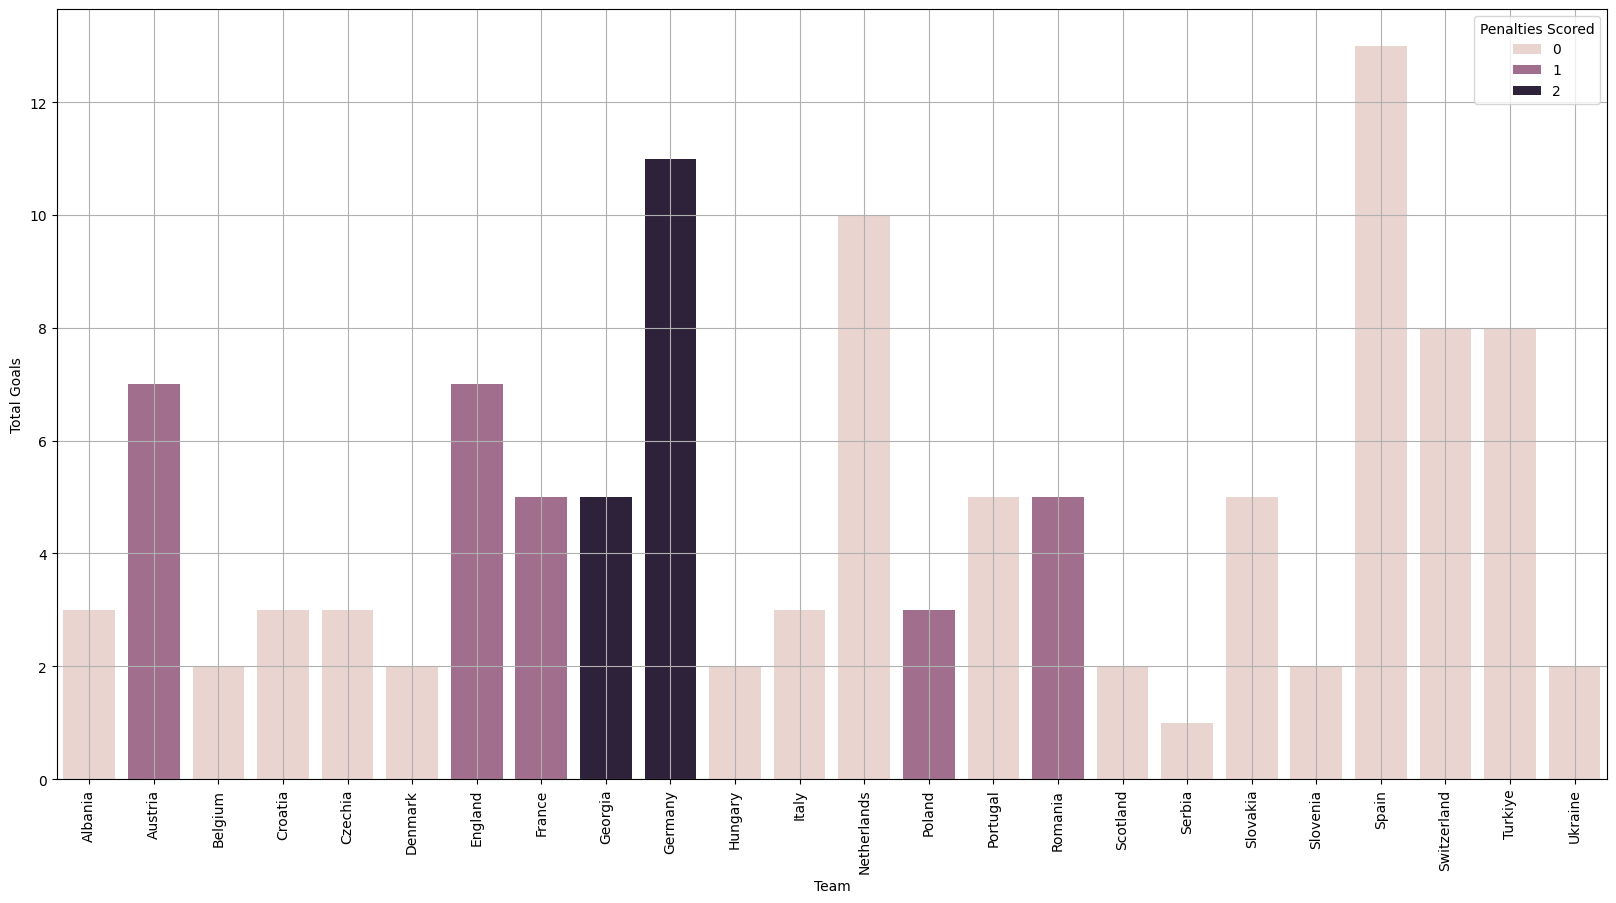

In [18]:
#Penaltı ile atılan gol sayısı.

plt.figure(figsize=(20,10))
sns.barplot(x = "Team", y = "Total Goals", data = df, hue = "Penalties Scored");
plt.xticks(rotation = 90);
plt.grid(True);


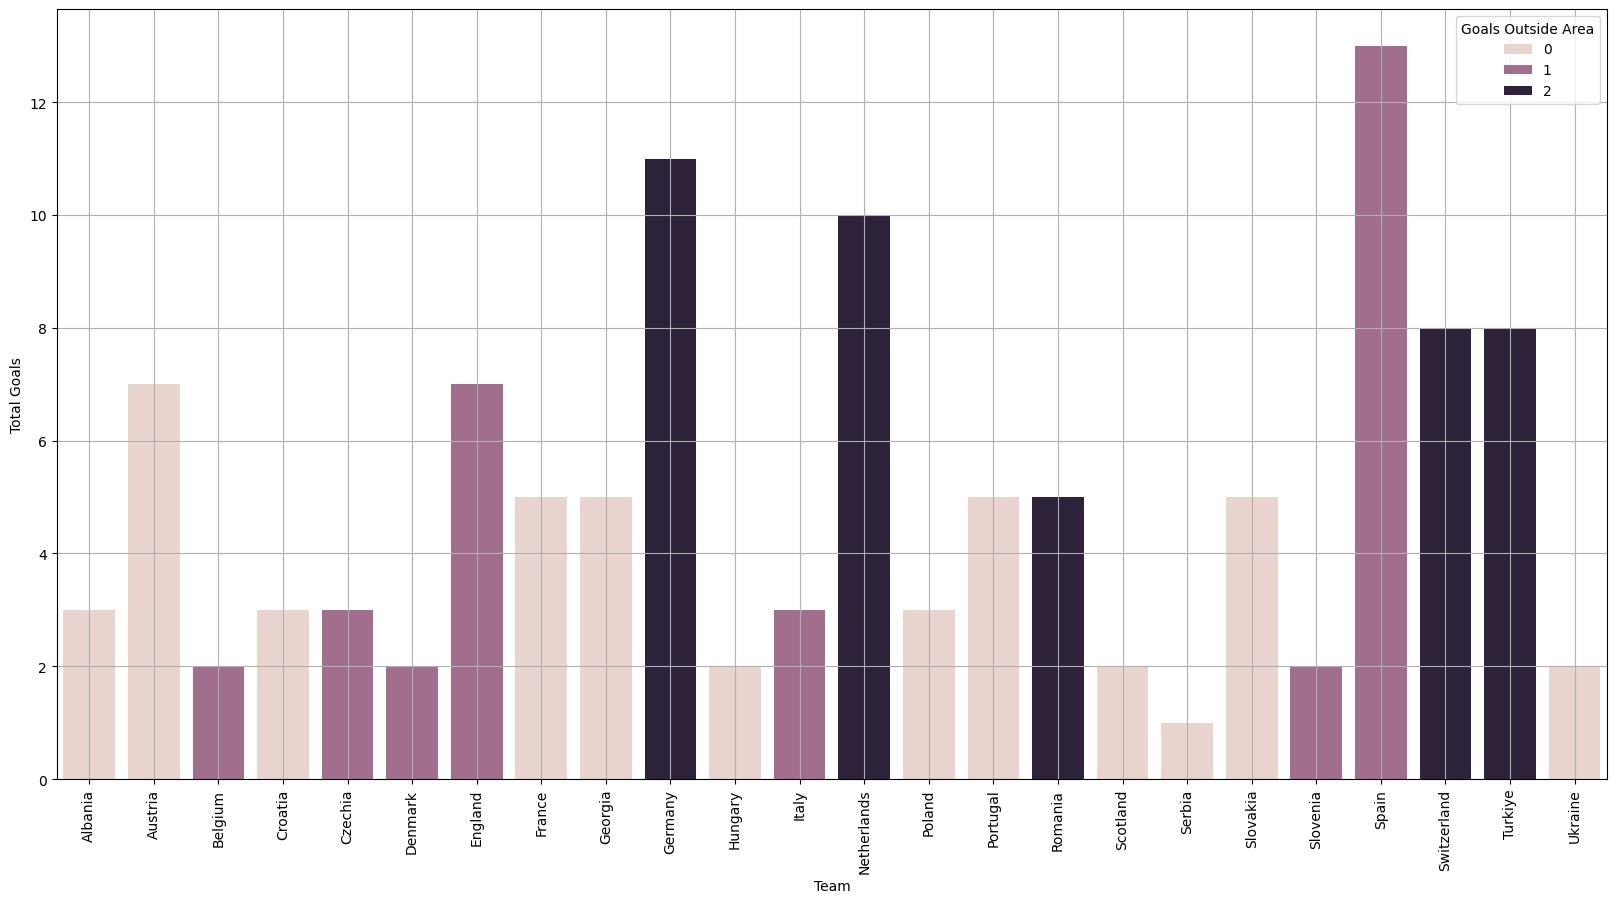

In [19]:
#Ceza sahası dışından atılan gol sayısı.

plt.figure(figsize=(20,10))
sns.barplot(x = "Team", y = "Total Goals", data = df, hue = "Goals Outside Area");
plt.xticks(rotation = 90);
plt.grid(True);

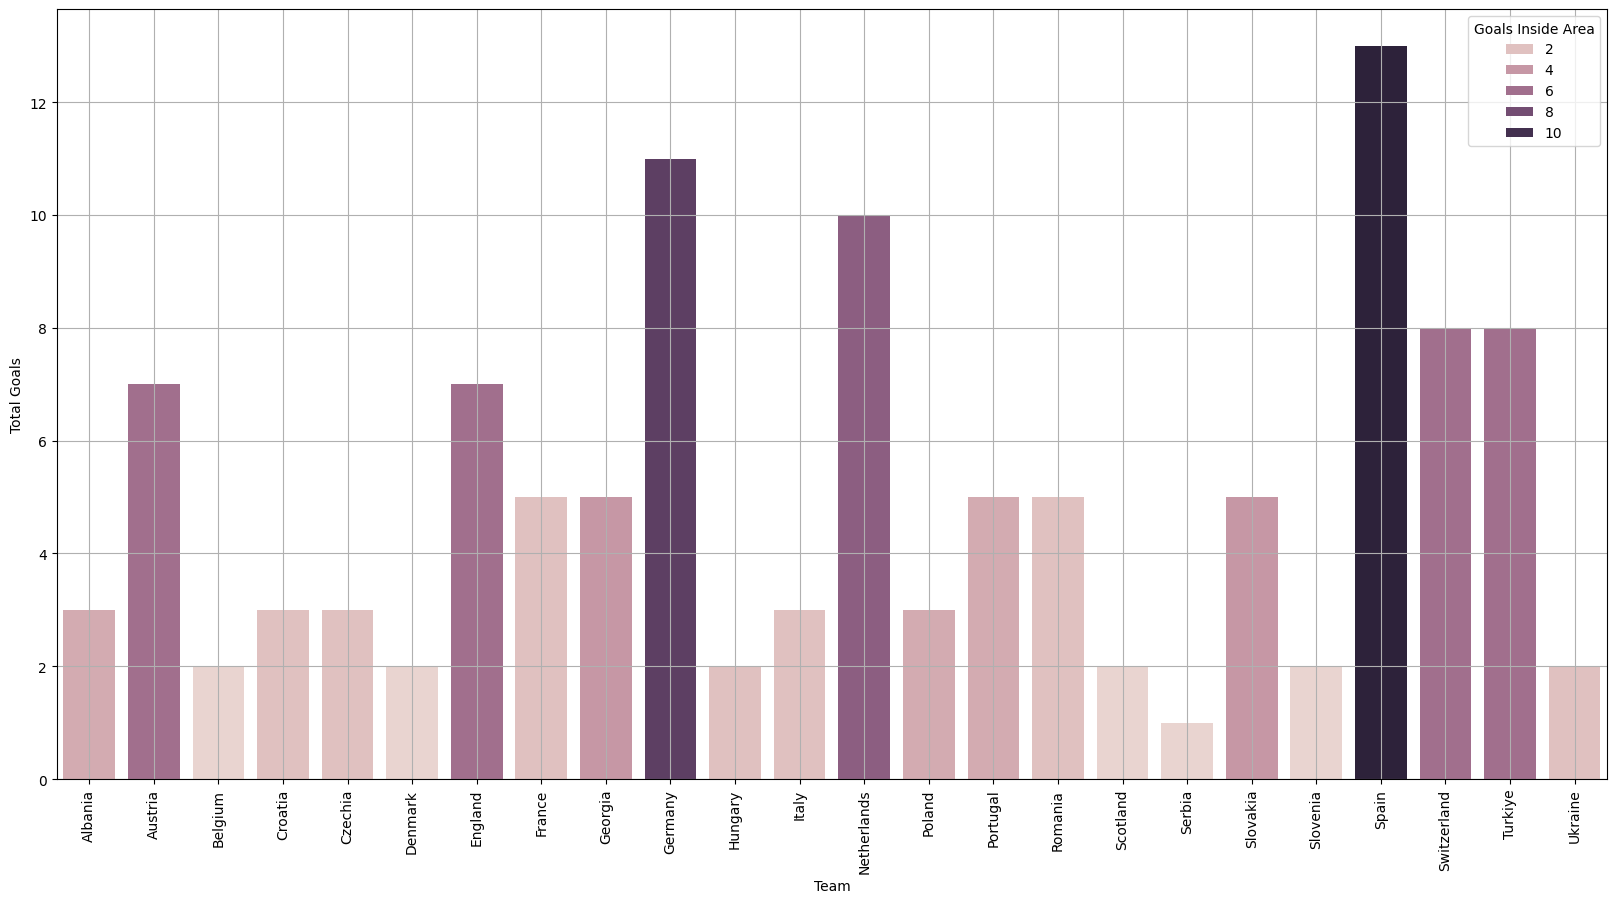

In [20]:
#Ceza sahası içinden atılan gol sayısı.

plt.figure(figsize=(20,10))
sns.barplot(x = "Team", y = "Total Goals", data = df, hue = "Goals Inside Area");
plt.xticks(rotation = 90);
plt.grid(True);

Index(['Team', 'Group', 'Matches Played', 'Won', 'Drawn', 'Lost',
       'Total Goals', 'Right Foot Goals', 'Left Foot Goals', 'Head Goals',
       'Other Goals', 'Goals Inside Area', 'Goals Outside Area',
       'Penalties Scored'],
      dtype='object')


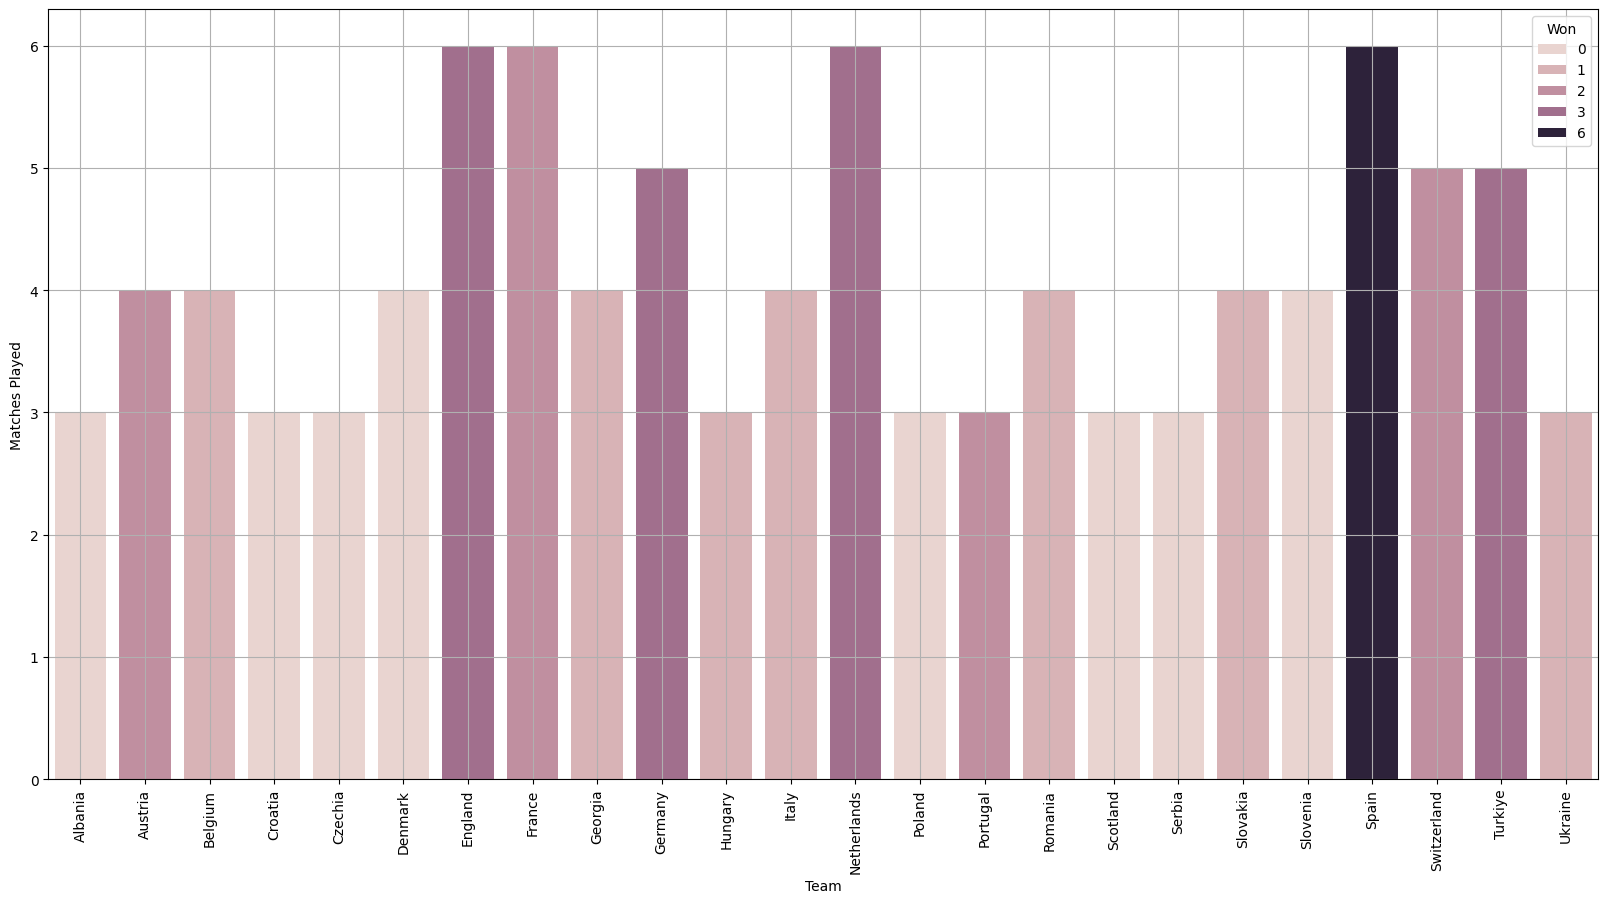

In [21]:
#Hangi takım kaç maç oynamış ve kaçını kazanmış?

df.columns = df.columns.str.strip()

print(df.columns)

plt.figure(figsize=(20,10))
sns.barplot(x="Team", y="Matches Played", data=df, hue="Won")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [22]:
#Turnuva boyunca hangi gruptaki hangi ülke ne kadar gol atmış?

#'Group' ve 'Total Goals' sütunları ile gruplama yaparak toplamları hesaplayalım.

grouped = df.groupby('Group')['Total Goals'].sum().reset_index()
#reset_index() indeksi sıfırlayarak, mevcut indeks değerlerini bir sütun olarak saklar ve sıfırdan başlayarak yeni bir sayısal indeks oluşturur.

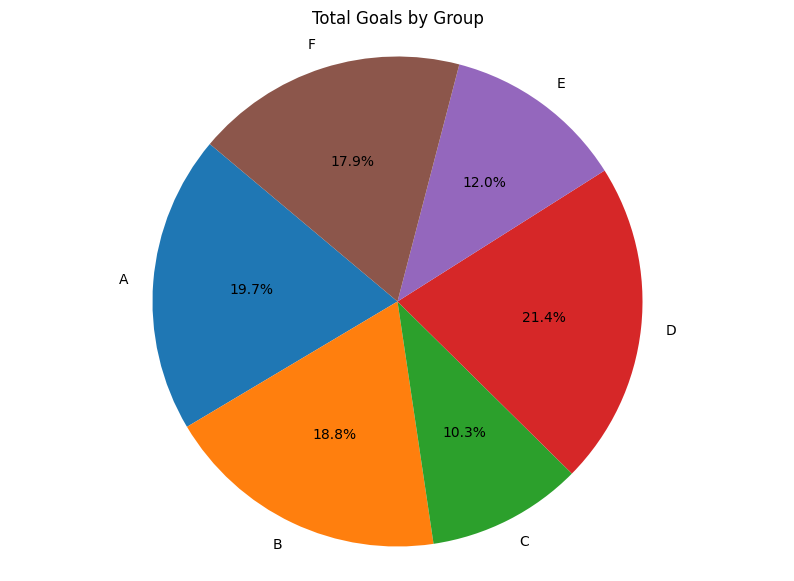

In [23]:
#PASTA GRAFİĞİ

plt.figure(figsize=(10, 7))     #Grafiğin boyutu 10x7
plt.pie(grouped['Total Goals'], labels=grouped['Group'], autopct='%1.1f%%', startangle=140)

#Pasta dilimi grafik çizmek için plt.pie kullandık.
#Grafiğin içine değerleri yüzdelik şekilde yazmak için autopct kullandık. Noktadan sonra 1 değer daha gelmesini istedik.
#Grafiği açıya göre çevirerek başlangıç noktasını değiştirmesi için startangle kullandık. (140°)

plt.title('Total Goals by Group')
plt.axis('equal')  #Daire şeklinde görselleştirme için 'equal'. (x ve y eksenlerinin birim uzunluklarının aynı olmasını sağlar.)
plt.show()

In [24]:
#Ortalama maç sayısı
average_matches = df['Matches Played'].mean()

#Özellikler ve hedef değişkenleri belirleyelim
X = df[['Matches Played']]
y_goals = df['Total Goals']
y_conceded = df['Matches Played'] - df['Won'] - df['Drawn']       #Gol yeme sayısını tahmin etmek için tahmini bir formül.

#Eğitim ve test verilerine ayırma
X_train, X_test, y_train_goals, y_test_goals = train_test_split(X, y_goals, test_size=0.2, random_state=42)
X_train, X_test, y_train_conceded, y_test_conceded = train_test_split(X, y_conceded, test_size=0.2, random_state=42)

#Modeli oluşturalım
model_goals = LinearRegression()
model_conceded = LinearRegression()

#Modeli eğitme
model_goals.fit(X_train, y_train_goals)
model_conceded.fit(X_train, y_train_conceded)

#Tahmin yapma
df['Predicted Goals'] = model_goals.predict(df[['Matches Played']])
df['Predicted Conceded'] = model_conceded.predict(df[['Matches Played']])

#Eşit maç sayısına göre tahmin yapma (yeni DataFrame oluştur)
average_matches_df = pd.DataFrame({'Matches Played': [average_matches]})
predicted_goals_at_avg = model_goals.predict(average_matches_df)
predicted_conceded_at_avg = model_conceded.predict(average_matches_df)

#Eşit maç sayısına göre tahminleri tüm DataFrame'e ekleme
df['Predicted Goals at Average Matches'] = predicted_goals_at_avg[0]
df['Predicted Conceded at Average Matches'] = predicted_conceded_at_avg[0]

#Sonuçları gösterme
print(df[['Team', 'Predicted Goals', 'Predicted Conceded']])

           Team  Predicted Goals  Predicted Conceded
0       Albania         2.460251            1.269874
1       Austria         4.732218            1.133891
2       Belgium         4.732218            1.133891
3       Croatia         2.460251            1.269874
4       Czechia         2.460251            1.269874
5       Denmark         4.732218            1.133891
6       England         9.276151            0.861925
7        France         9.276151            0.861925
8       Georgia         4.732218            1.133891
9       Germany         7.004184            0.997908
10      Hungary         2.460251            1.269874
11        Italy         4.732218            1.133891
12  Netherlands         9.276151            0.861925
13       Poland         2.460251            1.269874
14     Portugal         2.460251            1.269874
15      Romania         4.732218            1.133891
16     Scotland         2.460251            1.269874
17       Serbia         2.460251            1.

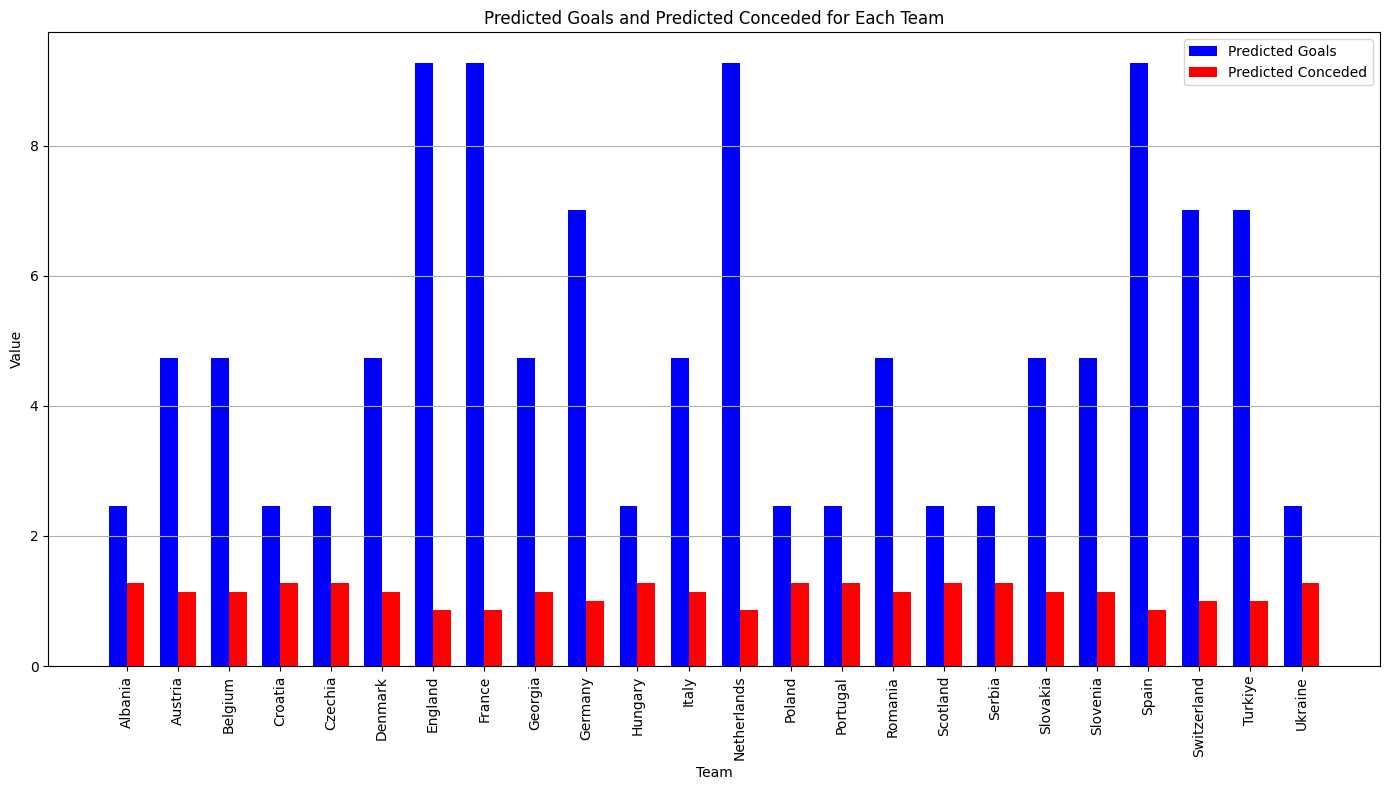

In [25]:
#Çıkan sonuçları görselleştirme.

# ütun grafiği oluşturma
plt.figure(figsize=(14, 8))

#Sütun genişliği
bar_width = 0.35
index = range(len(df))

#Predicted Goals ve Predicted Conceded sütunları
bar1 = plt.bar(index, df['Predicted Goals'], bar_width, label='Predicted Goals', color='b')
bar2 = plt.bar([i + bar_width for i in index], df['Predicted Conceded'], bar_width, label='Predicted Conceded', color='r')

#Eksen etiketleri ve başlık
plt.xlabel('Team')
plt.ylabel('Value')
plt.title('Predicted Goals and Predicted Conceded for Each Team')
plt.xticks([i + bar_width / 2 for i in index], df['Team'], rotation=90)
plt.legend()
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

Türkiye'nin Ortalama Gol Sayısı: 7.004184100418411
Türkiye'nin Ortalama Gol Yeme Sayısı: 0.9979079497907952
Tüm Ülkelerin Ortalama Gol Sayısı: 4.9215481171548126
Tüm Ülkelerin Ortalama Gol Yeme Sayısı: 1.1225592747559276
Türkiye'nin gol atma performansı ortalamanın üzerinde.
Türkiye'nin gol yeme performansı ortalamanın altında.


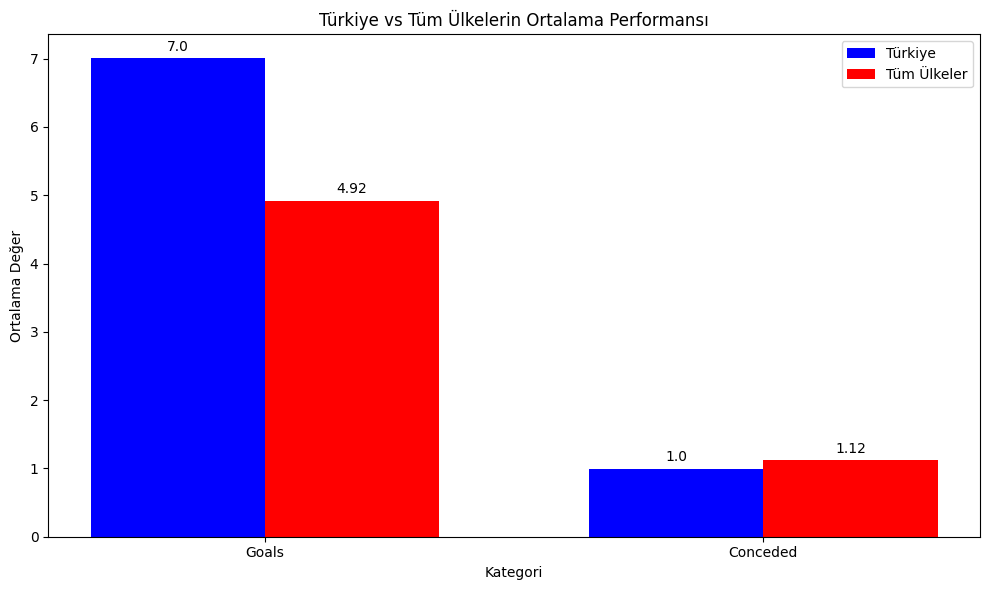

In [27]:
#Türkiye üzerine detaylı çalışma.

#Türkiye'nin verilerini çekelim.
turkey_data = df[df['Team'] == 'Turkiye']

#Türkiye'nin ortalama gol atma ve yeme verilerini alalım.
avg_goals_turkey = turkey_data['Predicted Goals'].values[0]            #Tüm değeleri getirmek için value.
avg_conceded_turkey = turkey_data['Predicted Conceded'].values[0]

#Tüm ülkelerin ortalama gol atma ve yeme verilerini hesaplama.
avg_goals_all = df['Predicted Goals'].mean()                           #Ortalama için mean.
avg_conceded_all = df['Predicted Conceded'].mean()

#Türkiye'nin performansını diğer ülkelerle karşılaştırma.
print(f"Türkiye'nin Ortalama Gol Sayısı: {avg_goals_turkey}")
print(f"Türkiye'nin Ortalama Gol Yeme Sayısı: {avg_conceded_turkey}")
print(f"Tüm Ülkelerin Ortalama Gol Sayısı: {avg_goals_all}")
print(f"Tüm Ülkelerin Ortalama Gol Yeme Sayısı: {avg_conceded_all}")

#Türkiye'nin performansını değerlendirme
if avg_goals_turkey < avg_goals_all:
    print("Türkiye'nin daha fazla gol atması gerekiyor.")
else:
    print("Türkiye'nin gol atma performansı ortalamanın üzerinde.")

if avg_conceded_turkey > avg_conceded_all:
    print("Türkiye'nin daha az gol yemesi gerekiyor.")
else:
    print("Türkiye'nin gol yeme performansı ortalamanın altında.")

# Türkiye'nin ve tüm ülkelerin ortalama gol ve gol yeme verilerini tanımlama
categories = ['Goals', 'Conceded']
turkey_values = [avg_goals_turkey, avg_conceded_turkey]
average_values = [avg_goals_all, avg_conceded_all]

# Grafik boyutlarını belirleme ve bar grafiklerini oluşturma
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = range(len(categories))

#Türkiye'nin performansı
bars1 = ax.bar(index, turkey_values, bar_width, label='Türkiye', color='b')

#Tüm ülkelerin ortalaması
bars2 = ax.bar([i + bar_width for i in index], average_values, bar_width, label='Tüm Ülkeler', color='r')

#Grafik etiketlerini ekleme
ax.set_xlabel('Kategori')
ax.set_ylabel('Ortalama Değer')
ax.set_title('Türkiye vs Tüm Ülkelerin Ortalama Performansı')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(categories)
ax.legend()

#Grafik üzerine değerleri ekleme
def add_values(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_values(bars1)
add_values(bars2)

#Grafiği gösterme
plt.tight_layout()
plt.show()